<a href="https://colab.research.google.com/github/241b116-ishhhhhhhh/APS-LAB/blob/main/lab_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Searching
Implement Linear Search. Determine the time required to search for element. Repeat the experiment for different values of n, the number of elements in the list to besearched and plot a graph of the time taken versus n.

- To implement Linear Search, measure its time complexity for searching an element, vary the input size by changing the number of elements in the list, and plot a graph to visualize the relationship between time taken and input size
- Algorithm:  
1. Start with the first element of the list.
2. Compare the element with the value being searched for.
3. If the element matches, return the index.
4. If the element does not match, move to the next element and repeat steps 2-3.
5. If the end of the list is reached and no match is found, return -1

- **Created by Dr. Ajay

  n=100: Found Time=0.000005s, Not Found Time=0.000006s
  n=500: Found Time=0.000012s, Not Found Time=0.000034s
  n=1000: Found Time=0.000044s, Not Found Time=0.000074s
  n=2000: Found Time=0.000055s, Not Found Time=0.000154s
  n=5000: Found Time=0.000232s, Not Found Time=0.000445s
  n=10000: Found Time=0.000530s, Not Found Time=0.000899s
  n=20000: Found Time=0.000847s, Not Found Time=0.001707s
  n=50000: Found Time=0.002197s, Not Found Time=0.004142s


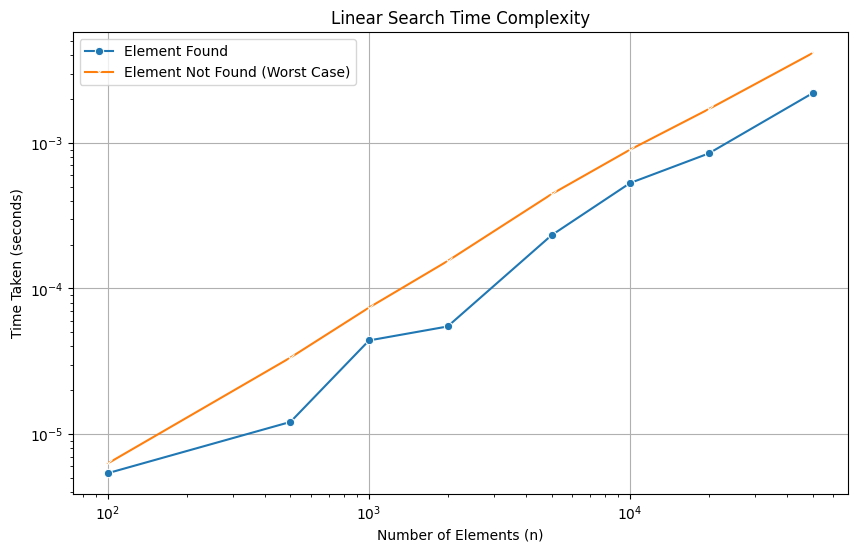

In [ ]:
import time
import random
import matplotlib.pyplot as plt

def linear_search(arr, target):
    for i in range(len(arr)):
        if arr[i] == target:
            return i
    return -1

def measure_linear_search_time(n, search_successful=True):
    data = [random.randint(0, 10 * n) for _ in range(n)]

    if search_successful:
        target = data[random.randint(0, n - 1)]
    else:
        target = 10 * n + 1
    start_time = time.time()
    linear_search(data, target)
    end_time = time.time()
    return end_time - start_time
n_values = [100, 500, 1000, 2000, 5000, 10000, 20000, 50000]
times_found = []
times_not_found = []
for n in n_values:
    successful_times = [measure_linear_search_time(n, search_successful=True) for _ in range(5)]
    times_found.append(sum(successful_times) / len(successful_times))

    unsuccessful_times = [measure_linear_search_time(n, search_successful=False) for _ in range(5)]
    times_not_found.append(sum(unsuccessful_times) / len(unsuccessful_times))
    print(f"  n={n}: Found Time={times_found[-1]:.6f}s, Not Found Time={times_not_found[-1]:.6f}s")
plt.figure(figsize=(10, 6))
sns.lineplot(x=n_values, y=times_found, marker='o', label='Element Found')
sns.lineplot(x=n_values, y=times_not_found, marker='x', label='Element Not Found (Worst Case)')
plt.title('Linear Search Time Complexity')
plt.xlabel('Number of Elements (n)')
plt.ylabel('Time Taken (seconds)')
plt.grid(True)
plt.legend()
plt.xscale('log')
plt.yscale('log')
plt.show()


# 2. Searching
Implement recursive Binary Search. Determine the time required to search an element.Repeat the experiment for different values of n, the number of elements in the list to besearched and plot a graph of the time taken versus n.
- implement recursive Binary Search, measure its time complexity for searching an element and plot a graph of time taken versus different values of n, the number of elements in the list.  
Algorithm:
1. Start with the middle element of the list
2. If the middle element matches the element being searched, return the index of the middle element
3. If the middle element is greater than the element being searched, recursively call the function on the left half of the list
4. If the middle element  is  less than the element  being searched, recursively call the function on the right half of the list
5. If the element is not found, return -1

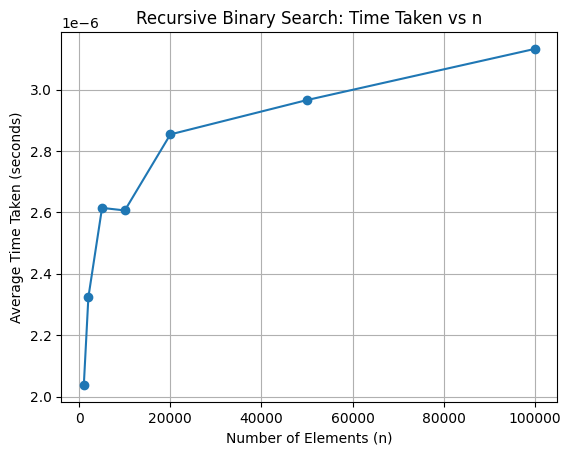

In [ ]:
#Prob_2: write code for recursive Binary Search and plot a graph to visualize the relationship between time taken and input size
import time
import matplotlib.pyplot as plt

def recursive_binary_search(arr, low, high, key):
    if low > high:
        return -1
    mid = (low + high) // 2
    if arr[mid] == key:
        return mid
    elif arr[mid] > key:
        return recursive_binary_search(arr, low, mid - 1, key)
    else:
        return recursive_binary_search(arr, mid + 1, high, key)

sizes = [1000, 2000, 5000, 10000, 20000, 50000, 100000]
times = []

for n in sizes:
    arr = list(range(n))
    key = n - 1
    repeats = 10000
    start = time.perf_counter()
    for _ in range(repeats):
        recursive_binary_search(arr, 0, n - 1, key)
    end = time.perf_counter()
    times.append((end - start) / repeats)

plt.plot(sizes, times, marker='o')
plt.xlabel("Number of Elements (n)")
plt.ylabel("Average Time Taken (seconds)")
plt.title("Recursive Binary Search: Time Taken vs n")
plt.grid(True)
plt.show()


#Prob-3
Given a text txt [0...n-1] and a pattern pat [0...m-1], write a function search (char pat [ ],char txt [ ]) that prints all occurrences of pat [ ] in txt [ ]. You may assume that n > m.
- Aim:  To write a function "search" that takes a pattern and a text as input, and outputs all occurrences of the pattern in the text.  Algorithm:
1. Initialize an empty list to store the indices where the pattern occurs in the text.
2. Loop through each character in the text. For each character, check if the substring starting at that character matches the pattern.
3. If there is a match, append the starting index of the substring to the list of occurrences.
4. Continue looping through the text until all possible substrings have been checked.
5. Return the list of indices where the pattern occurs in the text.  




In [ ]:
#write code for Prob-3def search(pat, txt):
def search(pat, txt):
    m = len(pat)
    n = len(txt)
    occurrences = []
    for i in range(n - m + 1):
        if txt[i:i + m] == pat:
            occurrences.append(i)

    return occurrences
txt = "ABABDABACDABABCABAB"
pat = "ABABCABAB"

result = search(pat, txt)

for index in result:
    print(f"Pattern found at index {index}")

Pattern found at index 10


#Prob-4
Sort a given set of elements using the Insertion sort and determine the time required tosort the elements. Repeat the experiment for different values of n, the number of elements in the list to be sorted and plot a graph of the time taken versus n.  
- Aim :  To Develop a program to implement Insertion sort and determine the time required to sort the elements.  
- Algorithm:  
1. Iterate over the array from the second element to the end (i = 1 to n-1).
2. For each element, compare it to the elements before it (j = i-1 to 0).
3. If the current element is smaller, swap it with the element before it.
4. Repeat step 3 until the current element is no longer smaller than the previous element.
5. Repeat steps 2-4 for all elements in the array.

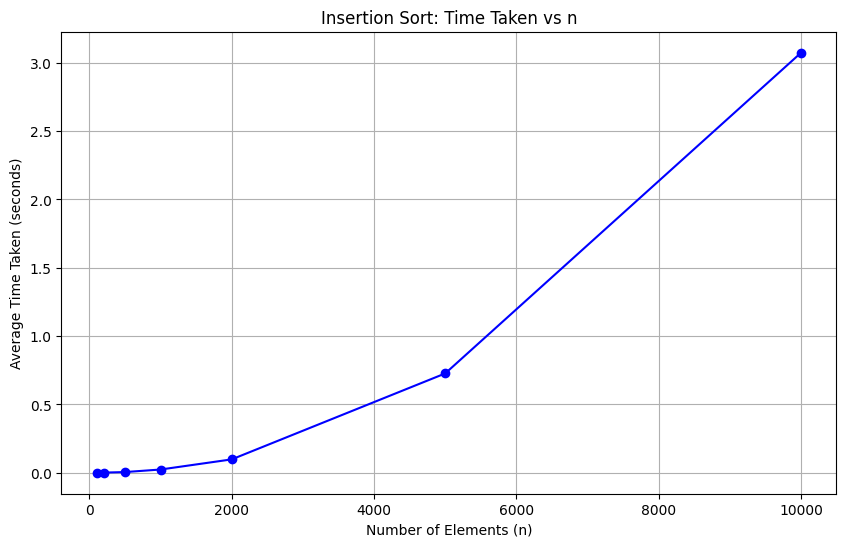

In [ ]:
#Prob_4: write code for insertion sort and plot a graph to visualize the relationship between time taken and input size
import time
import matplotlib.pyplot as plt
import random
def insertion_sort(arr):
    for i in range(1, len(arr)):
        key = arr[i]
        j = i - 1
        while j >= 0 and arr[j] > key:
            arr[j + 1] = arr[j]  # Shift element
            j -= 1
        arr[j + 1] = key
sizes = [100, 200, 500, 1000, 2000, 5000, 10000]
times = []
for n in sizes:
    arr = [random.randint(1, n) for _ in range(n)]
    repeats = 5

    start = time.perf_counter()
    for _ in range(repeats):
        arr_copy = arr.copy()
        insertion_sort(arr_copy)
    end = time.perf_counter()

    times.append((end - start) / repeats)
plt.figure(figsize=(10,6))
plt.plot(sizes, times, marker='o', color='blue')
plt.xlabel("Number of Elements (n)")
plt.ylabel("Average Time Taken (seconds)")
plt.title("Insertion Sort: Time Taken vs n")
plt.grid(True)
plt.show()
